In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [82]:
data = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')

In [83]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,"Aug. 15, 2022","Aug. 15, 2022",Indoor Run / Jog,632,4.74000,3600,12.65820,10.421800,4.74000,5.75715,122.0,8146.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6781978366
1,"Aug. 14, 2022","Aug. 14, 2022",Run,618,6.38464,4663,12.17350,8.817930,4.92875,6.80432,128.0,11001.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6779701822
2,"Aug. 12, 2022","Aug. 12, 2022",Indoor Run / Jog,831,6.21000,3617,9.70746,9.712310,6.18081,6.17773,144.0,9306.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6775716568
3,"Aug. 11, 2022","Aug. 11, 2022",Run,576,4.62746,3712,13.36610,1.546500,4.48896,38.79730,116.0,7878.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6771943882
4,"Aug. 10, 2022","Aug. 10, 2022",Run,863,7.02161,4441,10.53930,0.967622,5.69300,62.00770,144.0,11520.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6769680244


In [84]:
data.shape

(720, 15)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          720 non-null    object 
 1   Workout Date            720 non-null    object 
 2   Activity Type           720 non-null    object 
 3   Calories Burned (kCal)  720 non-null    int64  
 4   Distance (mi)           720 non-null    float64
 5   Workout Time (seconds)  720 non-null    int64  
 6   Avg Pace (min/mi)       720 non-null    float64
 7   Max Pace (min/mi)       720 non-null    float64
 8   Avg Speed (mi/h)        720 non-null    float64
 9   Max Speed (mi/h)        720 non-null    float64
 10  Avg Heart Rate          476 non-null    float64
 11  Steps                   696 non-null    float64
 12  Notes                   720 non-null    object 
 13  Source                  720 non-null    object 
 14  Link                    720 non-null    ob

In [86]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(data['Distance (mi)'])
data['target'] = labels
data.drop(columns=['Link', 'Source', 'Notes'], axis=1, inplace=True)

In [87]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
0,"Aug. 15, 2022","Aug. 15, 2022",Indoor Run / Jog,632,4.74000,3600,12.65820,10.421800,4.74000,5.75715,122.0,8146.0,460
1,"Aug. 14, 2022","Aug. 14, 2022",Run,618,6.38464,4663,12.17350,8.817930,4.92875,6.80432,128.0,11001.0,511
2,"Aug. 12, 2022","Aug. 12, 2022",Indoor Run / Jog,831,6.21000,3617,9.70746,9.712310,6.18081,6.17773,144.0,9306.0,502
3,"Aug. 11, 2022","Aug. 11, 2022",Run,576,4.62746,3712,13.36610,1.546500,4.48896,38.79730,116.0,7878.0,458
4,"Aug. 10, 2022","Aug. 10, 2022",Run,863,7.02161,4441,10.53930,0.967622,5.69300,62.00770,144.0,11520.0,523


In [88]:
data.isnull().sum()

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Max Pace (min/mi)           0
Avg Speed (mi/h)            0
Max Speed (mi/h)            0
Avg Heart Rate            244
Steps                      24
target                      0
dtype: int64

In [89]:
data.drop('Date Submitted', axis=1, inplace=True)

In [90]:
data2 = data[data['Workout Time (seconds)'].values < 30000]


data3 = data2[data2['Workout Time (seconds)'].values > 0]

data4 = data3[data3['Activity Type'] == 'Run']

data5 = data4[data4['Max Pace (min/mi)'].values < 15]

In [91]:
data5.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,355.000000,564.000000,564.000000
mean,457.611702,3.583764,2179.453901,9.951108,1.182612,6.190551,51.997124,122.416901,5565.868794,312.297872
std,263.549645,1.898490,1454.054708,2.329891,1.840102,0.796834,145.323722,57.260143,3172.457266,129.439329
min,19.000000,0.178743,106.000000,7.774190,0.000000,1.377360,0.000000,0.000000,281.000000,4.000000
25%,344.750000,2.976212,1574.250000,8.998992,0.000000,5.962408,0.000000,127.000000,4175.750000,246.250000
50%,409.000000,3.100935,1800.000000,9.566365,0.800227,6.271975,23.067450,149.000000,4800.500000,281.500000
75%,476.250000,4.000027,2331.500000,10.063050,1.141853,6.667417,62.269650,156.000000,6104.250000,411.250000
max,2473.000000,13.481600,18759.000000,43.561600,9.022240,7.717840,1853.550000,169.000000,23604.000000,550.000000


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Activity Type', ylabel='count'>

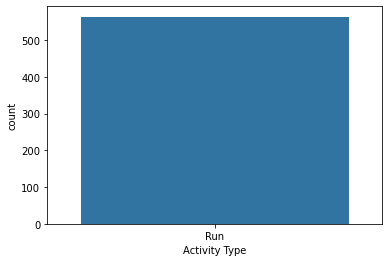

In [93]:
sns.countplot(x='Activity Type', data=data5)

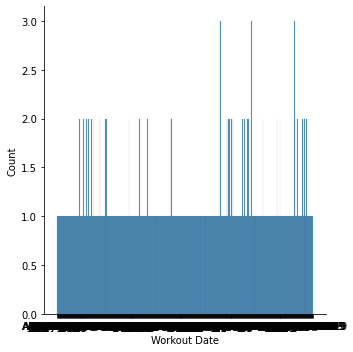

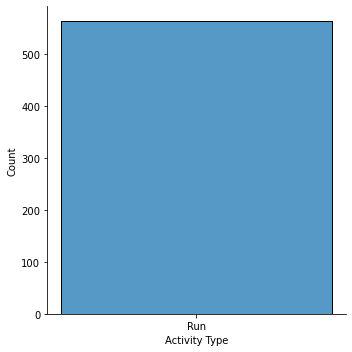

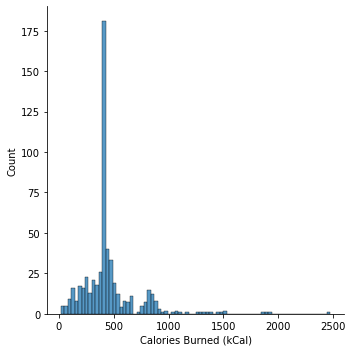

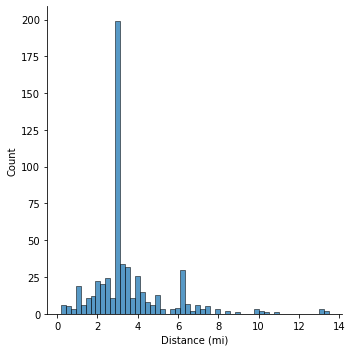

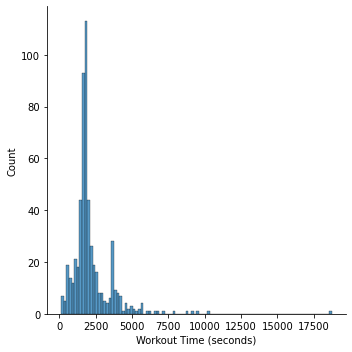

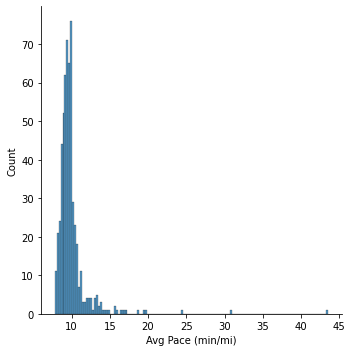

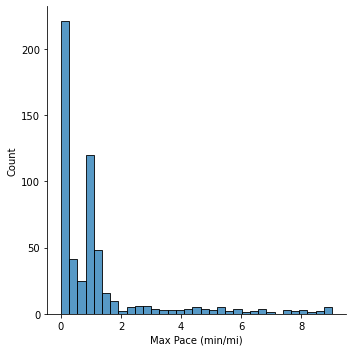

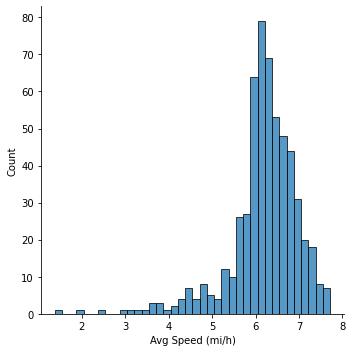

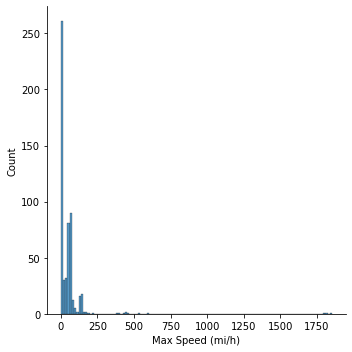

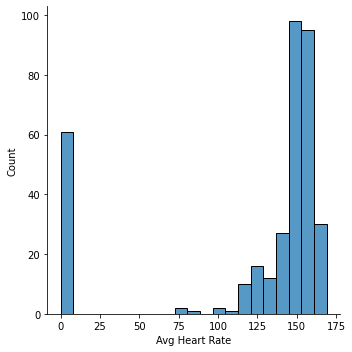

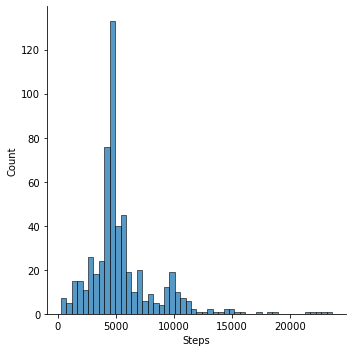

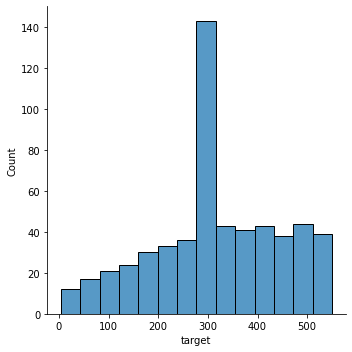

In [94]:
for column in data5:
    sns.displot(x=column, data=data5)

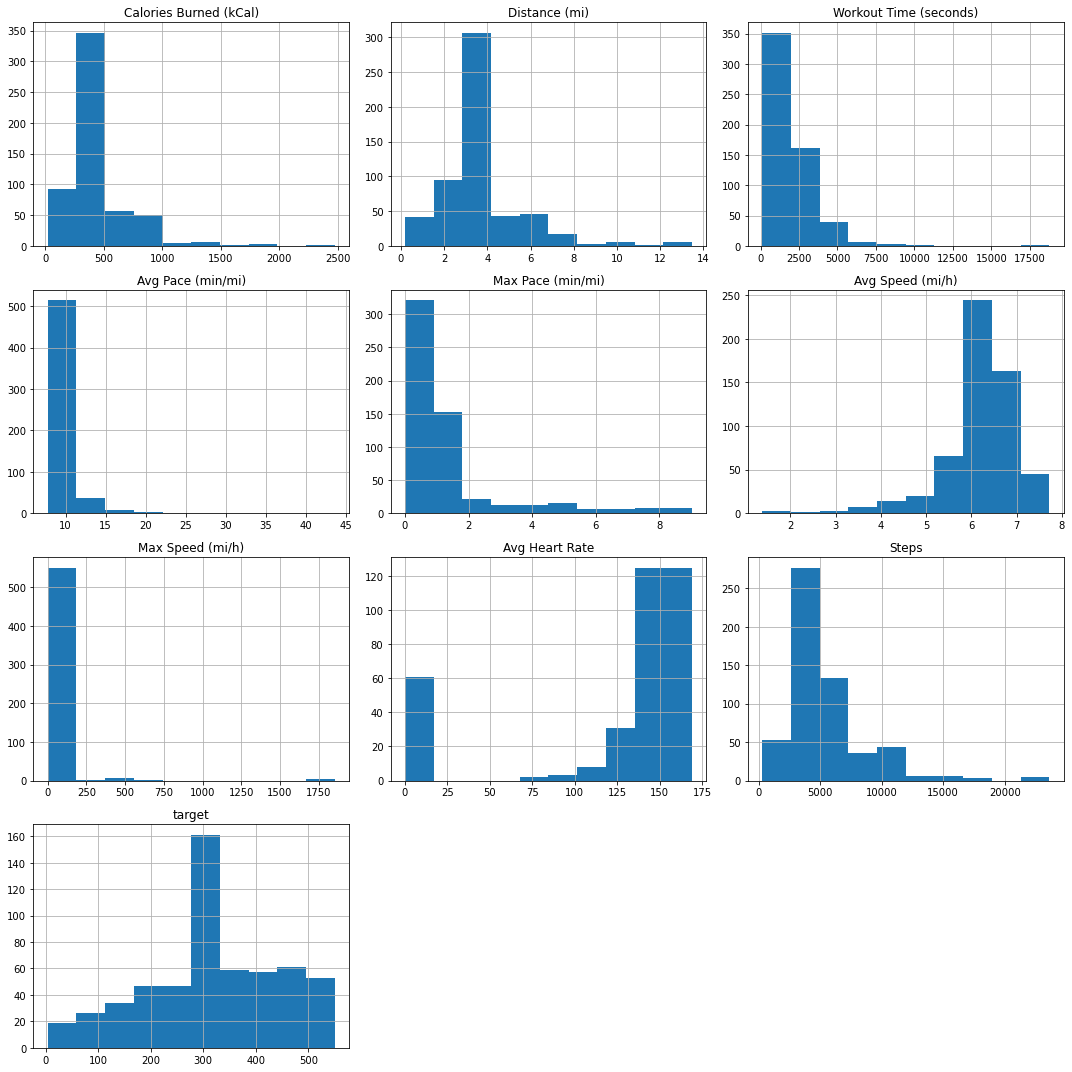

In [95]:
data5.hist(figsize=(15,15)) 
#set a large figsize if you have > 9 variables
plt.tight_layout()
plt.show()

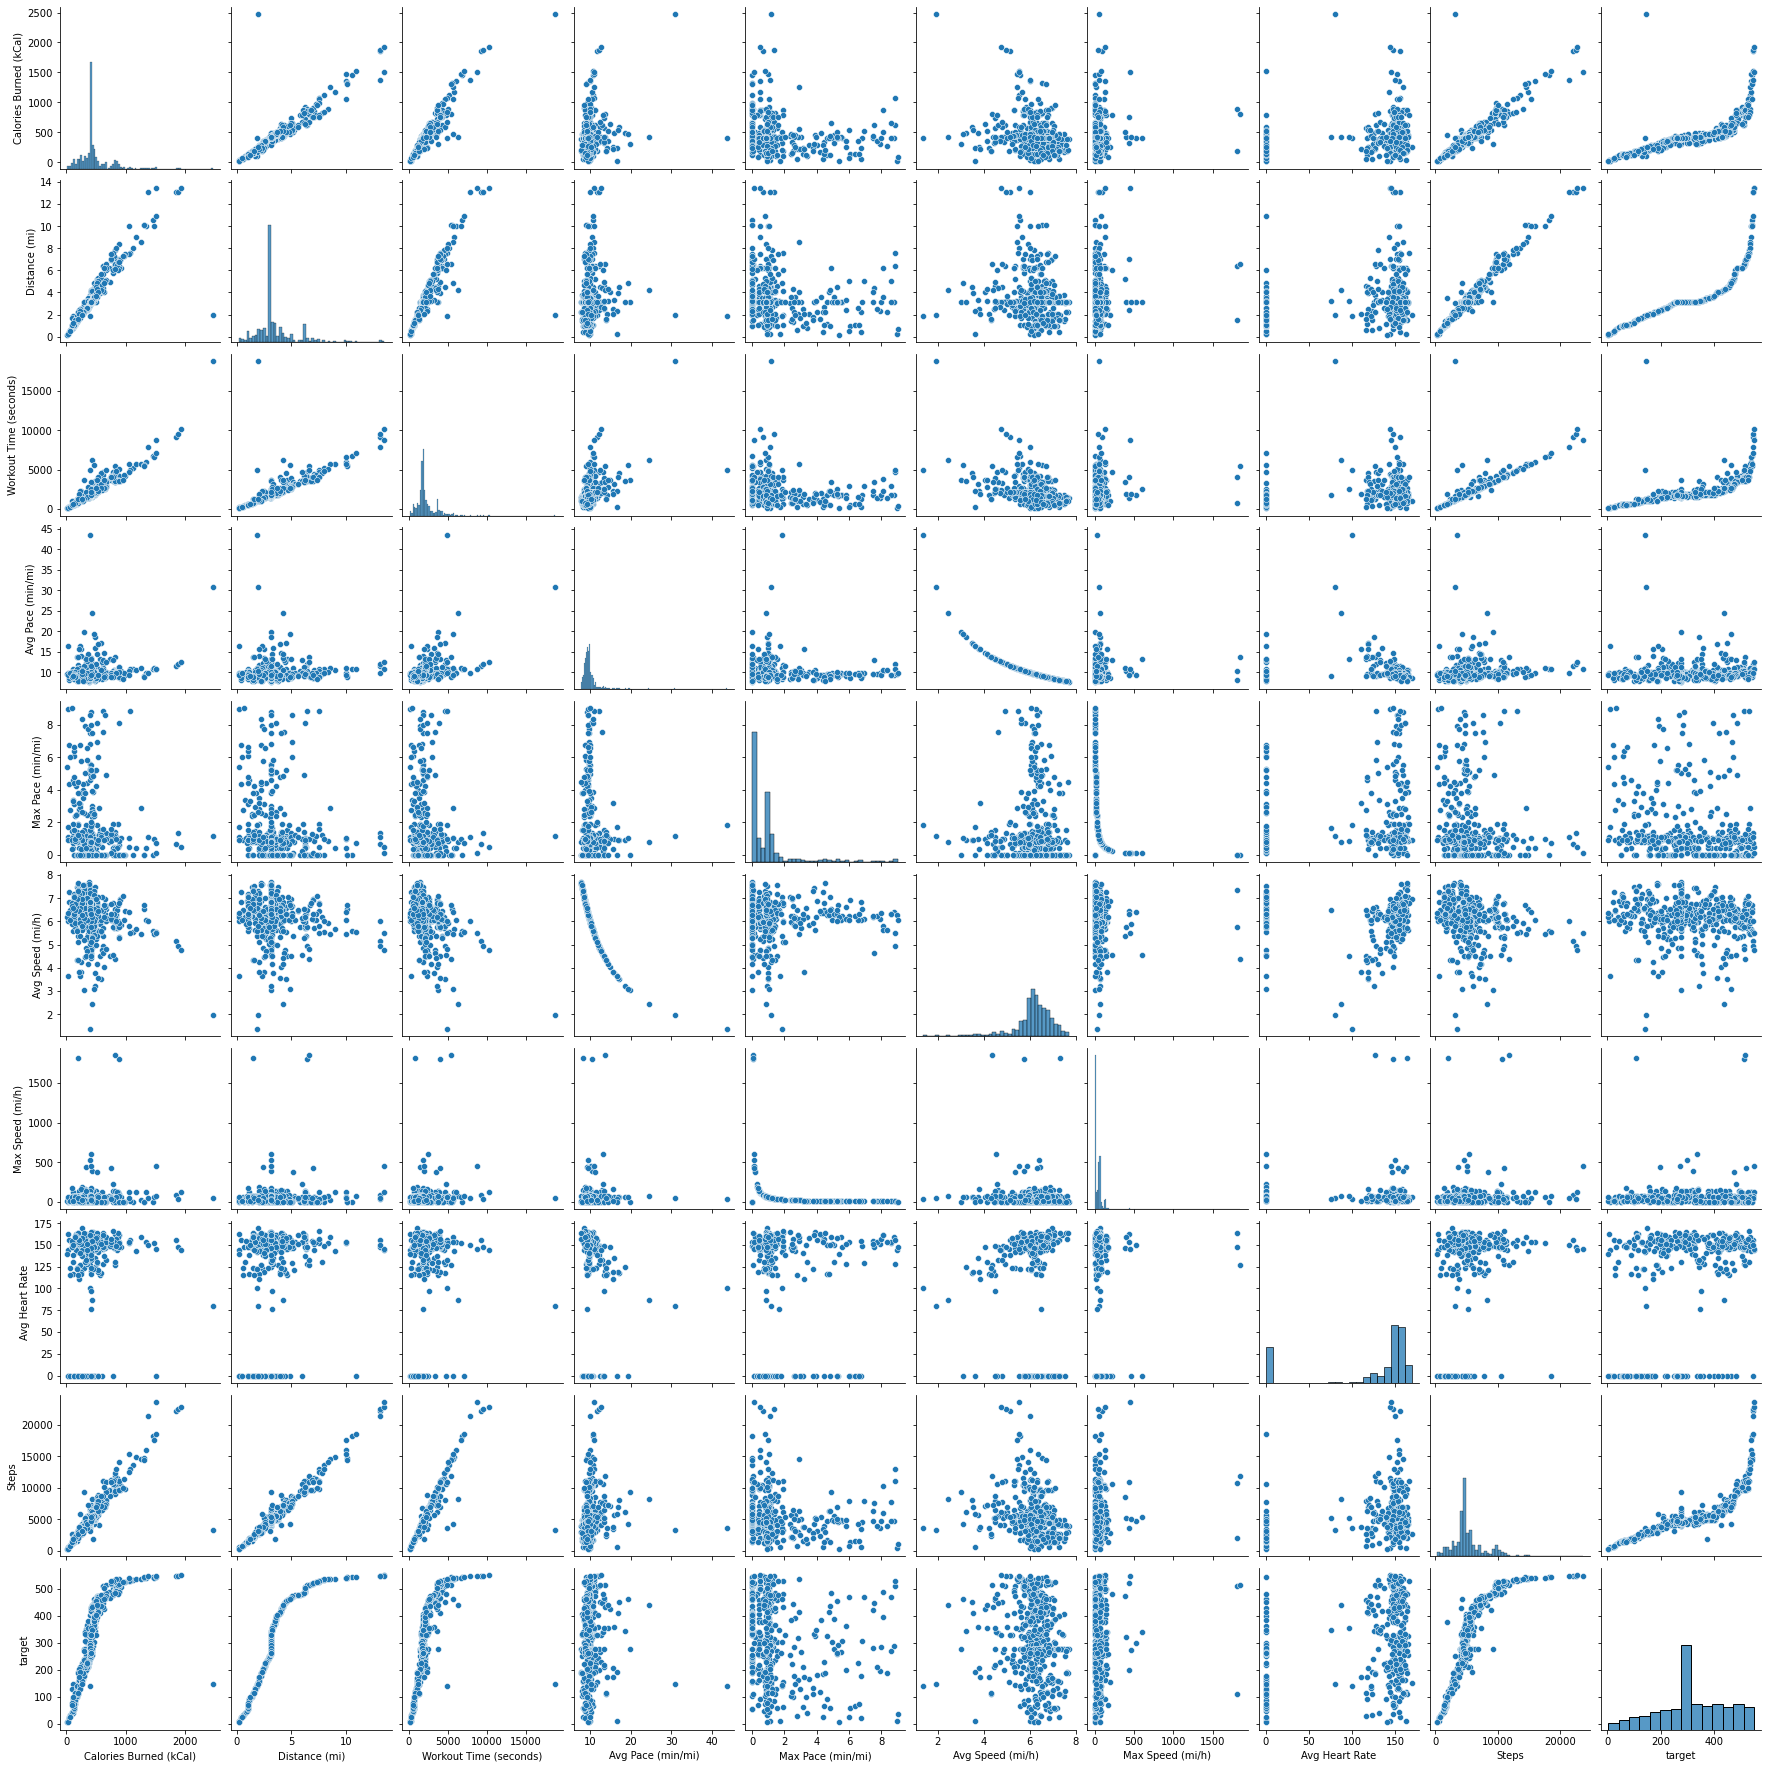

In [80]:
sns.pairplot(data5)

In [98]:
# data6 = data5.drop('Workout Date', axis=1, inplace=True)

# for column in data6:
#     plt.figure()
#     data.boxplot([column])

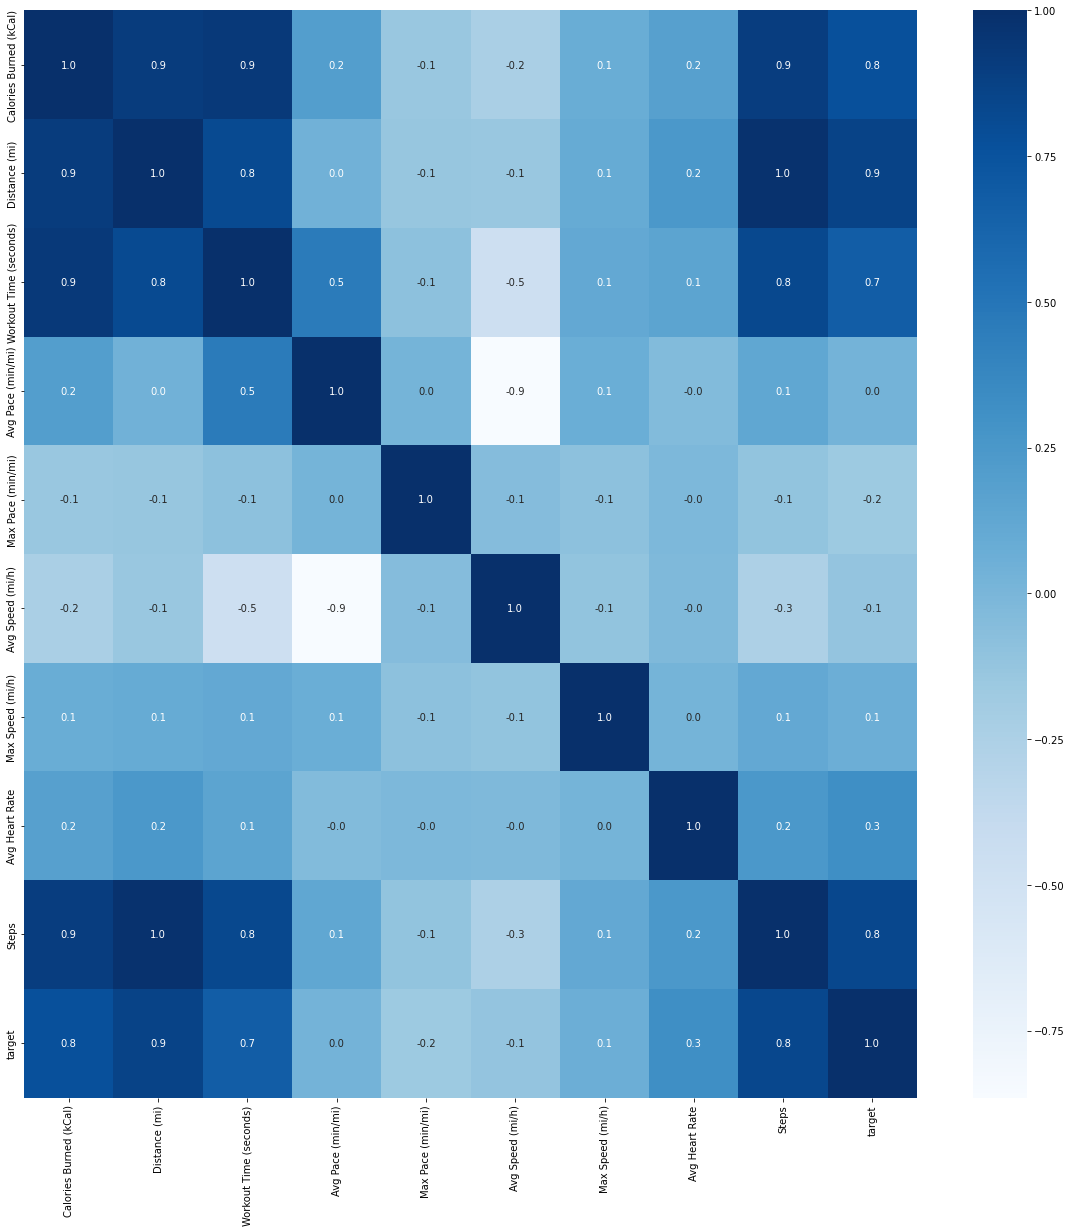

In [99]:
correlation_matrix = data5.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

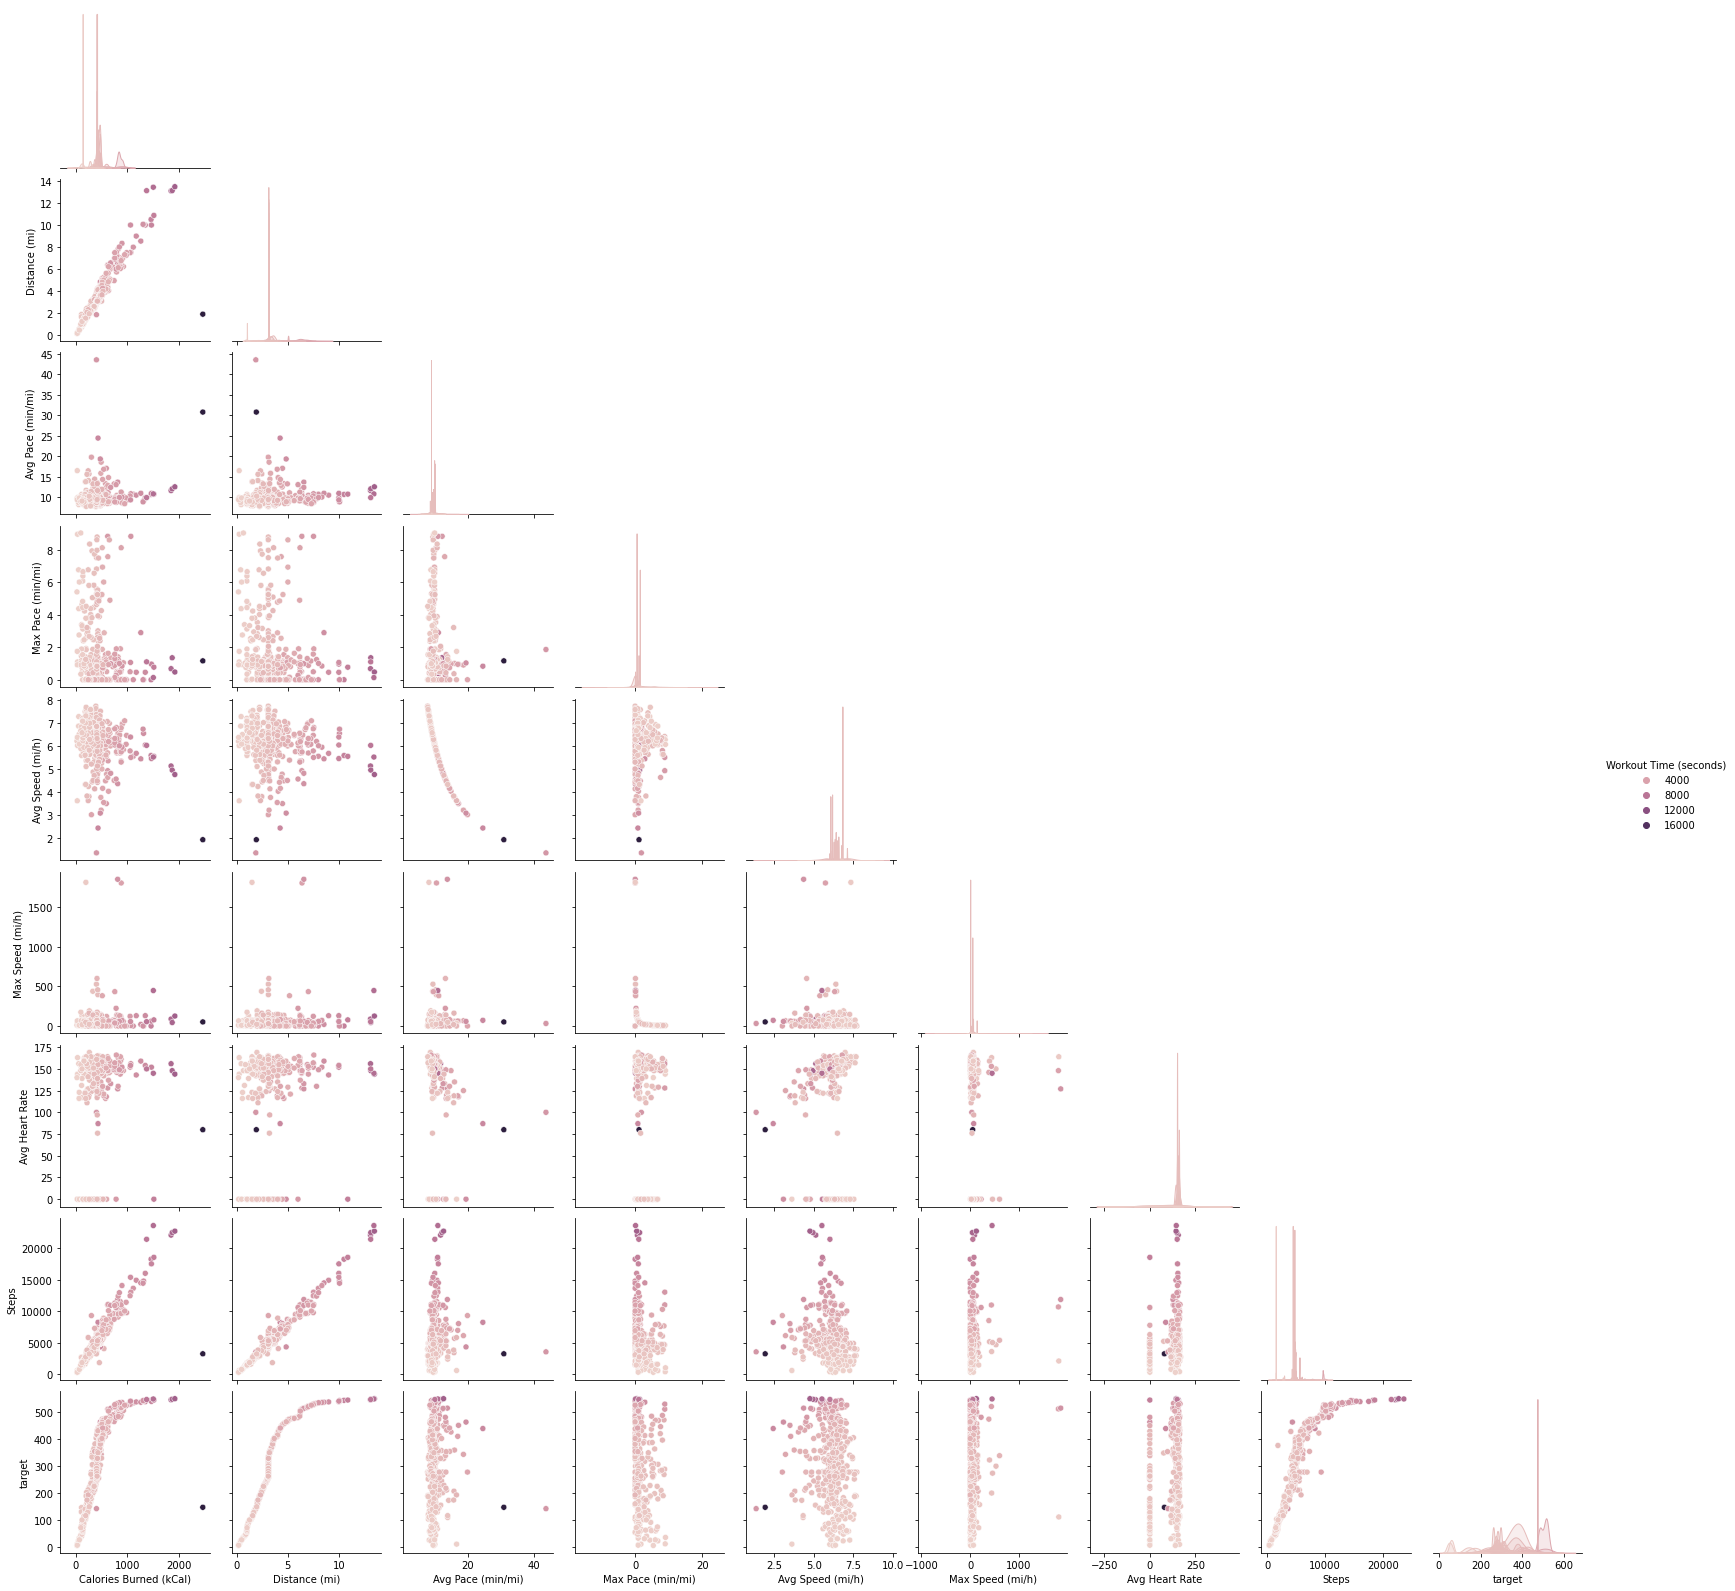

In [100]:
sns.pairplot(data5, corner=True, hue = 'Workout Time (seconds)')